In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

|Hyperparameter	|Binary Classification	|Multiclass classification|
|---------------|-----------------------|-------------------------|
|Input layer shape|	Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction)|	Same as binary classification|
|Hidden layer(s)|	Problem specific, minimum = 1, maximum = unlimited|	Same as binary classification|
|Neurons per hidden layer|	Problem specific, generally 10 to 100|	Same as binary classification|
|Output layer shape|	1 (one class or the other)|	1 per class (e.g. 3 for food, person or dog photo)|
|Hidden activation	|Usually ReLU (rectified linear unit)|	Same as binary classification|
|Output activation|	Sigmoid|	Softmax|
|Loss function|	Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow)|	Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow)|
|Optimizer|	SGD (stochastic gradient descent), Adam|	Same as binary classification|

|Data Type	|Input Shape|
|:-----------|:-----------|
|Image	|(image height, image width, number of channels)|
|Sequence|	(number of sequence steps, number of features)|
|Structured|	(samples/batch size, features)|

|Problem Type|	Output Neurons|	Target Format	|Loss Type	|Last Neuron Activation|
|----:-----|-----:-----|------:-------|-----:-----|-------:--------|
|Binary Classification	|1	|Binary|	binary_crossentropy|	sigmoid|
Multi Classification	|Number of classes|	One-Hot Encoded|	categorical_crossentropy	|softmax|
|Multi Classification	|Number of classes|	Label Encoded|	sparse_categorical_crossentropy	|softmax|
|Regression|	Number of predictions	|Numeric	|Any regression metric: MSE/RMSE/MSLE/Huber	| Usually None|


#### Common ways to improve a deep model:

• Adding layers

• Increase the number of hidden units

• Change the activation functions

• Change the optimization function

• Change the learning rate

• Fitting on more data

• Fitting for longer

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

X, y  = make_circles(n_samples, noise =  0.03, random_state = 42)

In [ ]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [ ]:
y[:5]

array([1, 1, 1, 1, 0])

In [ ]:
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "y": y})

In [ ]:
circles.head()

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


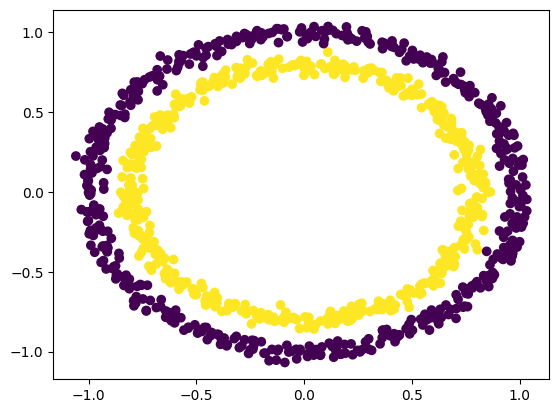

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

#### Creating Basic Model

In [ ]:
model_basic = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_basic.compile(loss = tf.keras.losses.binary_crossentropy,
                    optimizer = tf.keras.optimizers.SGD(),
                    metrics = ["accuracy"])

In [ ]:
model_basic.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7070 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7054 - accuracy: 0.5010
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7039 - accuracy: 0.4990
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7021 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.5000
Epoch 11/

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


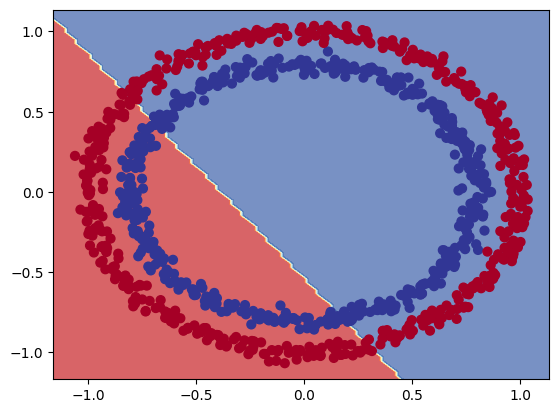

In [ ]:
plot_decision_boundary(model_basic, X, y)

In [ ]:
model_basic2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation = "relu", input_shape = [2]),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_basic2.compile(loss = tf.keras.losses.binary_crossentropy,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["accuracy"])

In [ ]:
model_basic2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7379 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7317 - accuracy: 0.4970
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7266 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7226 - accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7192 - accuracy: 0.4930
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.4900
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


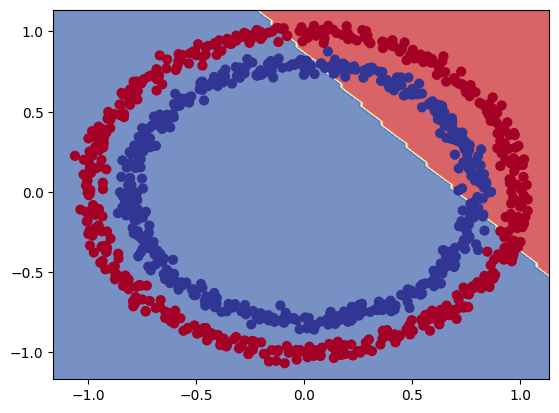

In [ ]:
plot_decision_boundary(model_basic2, X, y)

In [ ]:
model_basic3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation = "relu", input_shape = [2]),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_basic3.compile(loss = tf.keras.losses.binary_crossentropy,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["accuracy"])

In [ ]:
model_basic3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4970
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.4990
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5050
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5160
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5200
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5210
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5190
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


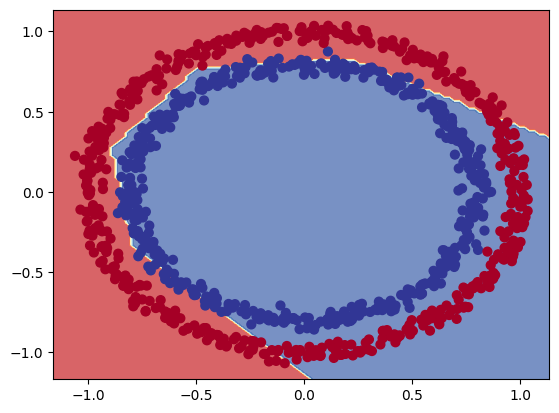

In [ ]:
plot_decision_boundary(model_basic3, X, y)

In [ ]:
model_advanced = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu", input_shape = [2]),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_advanced.compile(loss = tf.keras.losses.binary_crossentropy,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["accuracy"])

In [ ]:
model_advanced.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7033 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4940
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5020
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5250
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5070
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5050
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5050
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


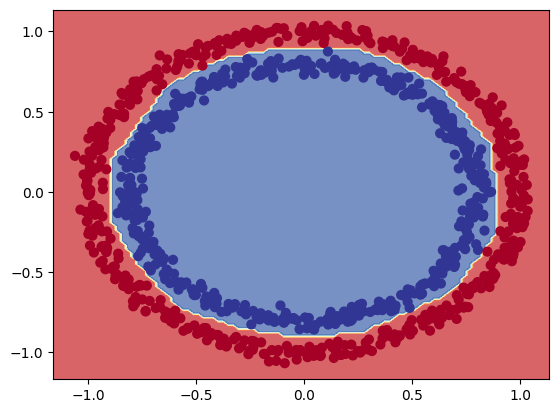

In [ ]:
plot_decision_boundary(model_advanced, X, y)

In [ ]:
model_basic3.summary(), model_advanced.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 5)                 15        
                                                                 
 dense_38 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                30        
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                              

(None, None)

In [ ]:
history1 = model_basic.fit(X, y, epochs = 100, verbose = 0)

Text(0.5, 0, 'Epochs')

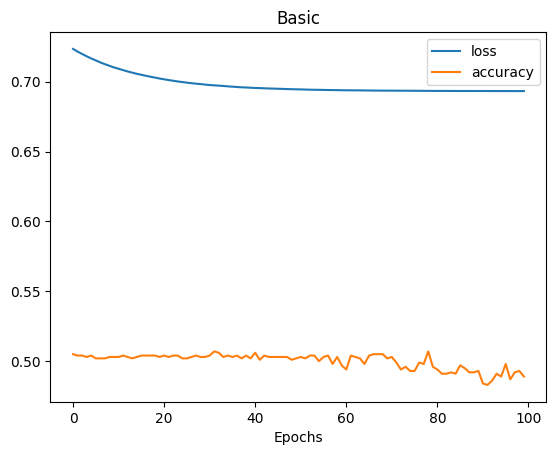

In [ ]:
pd.DataFrame(history1.history).plot()
plt.title("Basic")
plt.xlabel("Epochs")

In [ ]:
history3 = model_basic3.fit(X, y, epochs = 100, verbose = 0)

Text(0.5, 0, 'epochs')

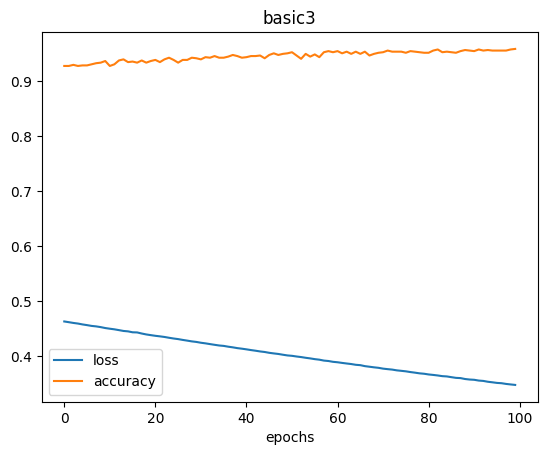

In [ ]:
pd.DataFrame(history3.history).plot()
plt.title("basic3")
plt.xlabel("epochs")